### About Dataset

**Context**
This is a small subset of dataset of Book reviews from Amazon Kindle Store category.

**Content**
- 5-core dataset of product reviews from Amazon Kindle Store category from May 1996 - July 2014. 

- Contains total of 9,82,619 entries. Each reviewer has at least 5 reviews and each product has at least 5 reviews in this dataset.

**Columns**

- asin - ID of the product, like B000FA64PK
- helpful - helpfulness rating of the review - example: 2/3.
- overall - rating of the product.
- reviewText - text of the review (heading).
- reviewTime - time of the review (raw).
- reviewerID - ID of the reviewer, like A3SPTOKDG7WBLN
- reviewerName - name of the reviewer.
- summary - summary of the review (description).
- unixReviewTime - unix timestamp.

**Acknowledgements**

This dataset is taken from Amazon product data, Julian McAuley, UCSD website. http://jmcauley.ucsd.edu/data/amazon/
License to the data files belong to them.

Inspiration
- Sentiment analysis on reviews.
- Understanding how people rate usefulness of a review/ What factors influence helpfulness of a review.
- Fake reviews/ outliers.
- Best rated product IDs, or similarity between products based on reviews alone (not the best idea ikr).

#### Steps carried out below
1. Preprocessing And Cleaning (Feature Engineering)
2. Train Test Split
3. BOW,TFIDF,Word2vec
4. Train ML algorithms

In [1]:
# Load the dataset
import pandas as pd
data=pd.read_csv('../data/all_kindle_review.csv')
data.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


In [2]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'asin', 'helpful', 'rating', 'reviewText',
       'reviewTime', 'reviewerID', 'reviewerName', 'summary',
       'unixReviewTime'],
      dtype='object')

In [3]:
# Filtering the needed columns
df=data[['reviewText','rating']]
df.head()

,reviewText,rating
0,"Jace Rankin may be short, but he's nothing to ...",3
1,Great short read. I didn't want to put it dow...,5
2,I'll start by saying this is the first of four...,3
3,Aggie is Angela Lansbury who carries pocketboo...,3
4,I did not expect this type of book to be in li...,4


In [4]:
df.shape

(12000, 2)

In [5]:
## Missing Values
df.isnull().sum()

reviewText    0
rating        0
dtype: int64

In [6]:
df['rating'].unique()

array([3, 5, 4, 2, 1])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  12000 non-null  object
 1   rating      12000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 187.6+ KB


In [8]:
df['rating'].value_counts(normalize=True)*100

rating
5    25.000000
4    25.000000
3    16.666667
2    16.666667
1    16.666667
Name: proportion, dtype: float64

## Preprocessing And Cleaning

In [9]:
## postive review is 1(Ratings 3,4,5) and negative review is 0(Ratings 1,2)
df.loc[:, 'rating'] = df['rating'].apply(lambda x:0 if x<3 else 1)

In [10]:
df['rating'].value_counts()

rating
1    8000
0    4000
Name: count, dtype: int64

In [11]:
df.head()

,reviewText,rating
0,"Jace Rankin may be short, but he's nothing to ...",1
1,Great short read. I didn't want to put it dow...,1
2,I'll start by saying this is the first of four...,1
3,Aggie is Angela Lansbury who carries pocketboo...,1
4,I did not expect this type of book to be in li...,1


In [14]:
## 1. Lower All the cases
df.loc[:, 'reviewText']=df['reviewText'].str.lower()

In [15]:
df.head()

,reviewText,rating
0,"jace rankin may be short, but he's nothing to ...",1
1,great short read. i didn't want to put it dow...,1
2,i'll start by saying this is the first of four...,1
3,aggie is angela lansbury who carries pocketboo...,1
4,i did not expect this type of book to be in li...,1


In [16]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/dijin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
from bs4 import BeautifulSoup

In [19]:
## Removing special characters
df.loc[:, 'reviewText'] = df['reviewText'].apply(lambda x:re.sub('[^a-z A-z 0-9-]+', '',x))
## Remove the stopswords
df.loc[:, 'reviewText'] = df['reviewText'].apply(lambda x:" ".join([y for y in x.split() if y not in stopwords.words('english')]))
## Remove url 
df.loc[:, 'reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x)))
## Remove html tags
df.loc[:, 'reviewText'] = df['reviewText'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())
## Remove any additional spaces
df.loc[:, 'reviewText'] = df['reviewText'].apply(lambda x: " ".join(x.split()))


In [20]:
df.head()

,reviewText,rating
0,jace rankin may short hes nothing mess man hau...,1
1,great short read didnt want put read one sitti...,1
2,ill start saying first four books wasnt expect...,1
3,aggie angela lansbury carries pocketbooks inst...,1
4,expect type book library pleased find price right,1


In [26]:
## Lemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/dijin/nltk_data...


True

In [27]:
lemmatizer=WordNetLemmatizer()

In [28]:
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])


In [29]:
df.loc[:, 'reviewText']=df['reviewText'].apply(lambda x:lemmatize_words(x))

In [99]:
df.head()

,reviewText,rating
0,jace rankin may short he nothing mess man haul...,1
1,great short read didnt want put read one sitti...,1
2,ill start saying first four book wasnt expecti...,1
3,aggie angela lansbury carry pocketbook instead...,1
4,expect type book library pleased find price right,1


In [31]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['reviewText'],df['rating'],
                                              test_size=0.20)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
bow=CountVectorizer()
X_train_bow=bow.fit_transform(X_train).toarray()
X_test_bow=bow.transform(X_test).toarray()

In [34]:
X_train_bow[0]

array([0, 0, 0, ..., 0, 0, 0], shape=(35752,))

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
X_train_tfidf=tfidf.fit_transform(X_train).toarray()
X_test_tfidf=tfidf.transform(X_test).toarray()

In [36]:
X_train_tfidf[0]

array([0., 0., 0., ..., 0., 0., 0.], shape=(35752,))

In [37]:
from sklearn.naive_bayes import GaussianNB
nb_model_bow=GaussianNB().fit(X_train_bow,y_train)
nb_model_tfidf=GaussianNB().fit(X_train_tfidf,y_train)

In [45]:
from sklearn.naive_bayes import MultinomialNB
nb_model_bow = MultinomialNB().fit(X_train_bow, y_train)
nb_model_tfidf = MultinomialNB().fit(X_train_tfidf, y_train)


In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [47]:
y_pred_bow=nb_model_bow.predict(X_test_bow)

In [48]:
y_pred_tfidf=nb_model_bow.predict(X_test_tfidf)

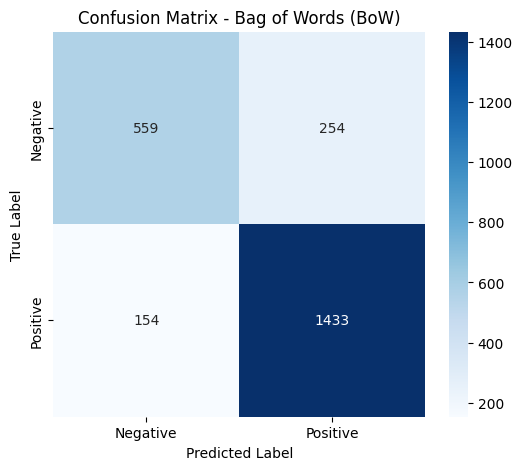

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_bow)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Bag of Words (BoW)")
plt.show()


In [50]:
print("BOW accuracy: ",accuracy_score(y_test,y_pred_bow))

BOW accuracy:  0.83


In [51]:
confusion_matrix(y_test,y_pred_tfidf)

array([[ 425,  388],
       [  79, 1508]])

In [52]:
print("TFIDF accuracy: ",accuracy_score(y_test,y_pred_tfidf))

TFIDF accuracy:  0.8054166666666667
